# Example 3 - Localized Vortices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
from pyphoenix import pyphoenix

# System Parameters
grid_size = 500                  # Grid Size, int this case 200x200
x_max = 200                      # mum; Maximum Distance in one direction, meaning the grid will be from -100mum to 100mum
effective_mass = 5.6856E-4       # kg; Effective Mass of the electron, scaled
gamma_c = 0.15                   # Polariton Loss Rate
gamma_r = 1.5 * gamma_c          # Reservoir Loss Rate
R = 0.01                         # Condensation Rate
g_c = 3E-6                       # Polariton-Polariton Coupling
g_r = 2*g_c                      # Polariton-Reservoir Coupling
deltaLT = 0.000025               # TE/TM interaction
g_pm = 0.2*g_c                   # TE/TM Whatever

# Special Parameters for this example
pump_amp = 100                  # Pulse Amplitude

# Additional Parameters not required by PHOENIX:
hbar = 6.582119569E-4
dx = x_max/grid_size

# Matrix Generation

In this example, we are fine with using PHOENIX's ability to generate spacial shapes via its envelope syntax.


# Run a Simulation with PHOENIX

We also plot the test calculation. The resulting density should resemble a hexagon.

In [2]:
def run(t_max: float = 500, m_plus: int = 0, m_minus: int = -4, pump_sigma : float = 4.5, output_suffix: str = "", simple_output: bool = True):
    # define simulation parameters with a dict
    config={
        "N":[grid_size,grid_size],   # Set the grid size in points
        "L":[x_max,x_max],           # Set the grid size in mum
        "meff":effective_mass,       # Set the effective mass
        "tmax":500,                  # Set the end time
        "outEvery":50,               # Set sample rate to 50ps. We don't need intermediate results, so setting this high will increase the simulation speed
        "fftEvery":5,                # Set the FFT sample rate. Even though we don't need the FFT, setting this high will increase the simulation speed as the FFT is still calculated.
        "gc":g_c,                    # Set the coupling constants
        "gr":g_r,                    # Set the coupling constants
        "R":R,                       # Set the condensation rate
        "gammaR":gamma_r,            # Set the reservoir loss rate
        "gammaC":gamma_c,            # Set the polariton loss rate
        "deltaLT":deltaLT,           # Set the TE/TM interaction
        "g_pm":g_pm,                 # Set the TE/TM Whatever
        "boundary": ["zero","zero"] # Set the boundary conditions
    }
    # Set initial state
    config["initRandom"]=[1E-7,"random"]
    config["initialState"]=[1,"add",pump_sigma,pump_sigma,0,0,"plus",1,m_plus,"gauss+noDivide+ring"]
    config["initialState "]=[1,"add",pump_sigma,pump_sigma,0,0,"minus",1,m_minus,"gauss+noDivide+ring"]

    # Set output
    config["output"]='wavefunction' if simple_output else 'all'
    # Add a pump to both states as well as the initial states
    config["pump"]=[pump_amp,"add",pump_sigma,pump_sigma,0,0,"both",1,"none gauss+noDivide+ring"]

    config["threads"]=2

    ph=pyphoenix.pyphoenix(debug=False,precision="fp32",tetm=True)
    ph.run(config)
    return ph

ph=run(t_max = 500, m_plus = 0, m_minus = -4, pump_sigma = 12/np.sqrt(2), simple_output=False)

    T = 300ps - dt = 0.08ps
    Progress: [▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇]  60%   
    Current System: TE/TM - No Stochastic
    Runtime: 1s, remaining: 0s
    Time per ps: 0.0036s/ps-  277ps/s-  3.45e+03it/s


### Plotting
PHOENIX saves outputs using one row per line, saving real parts first. This means, for our NxN complex matrices, PHOENIX will output a textfile containing a 2NxN (rows,cols) matrix. When loading the real and imaginary parts of the result, we can also calculate the phase using `np.angle`. Since we did not precalculate any of the matrices, we also do not have and X,Y matrix at this point in time. We could generate an X,Y meshgrid here, but we can also simply plot the matrix without any bounds.

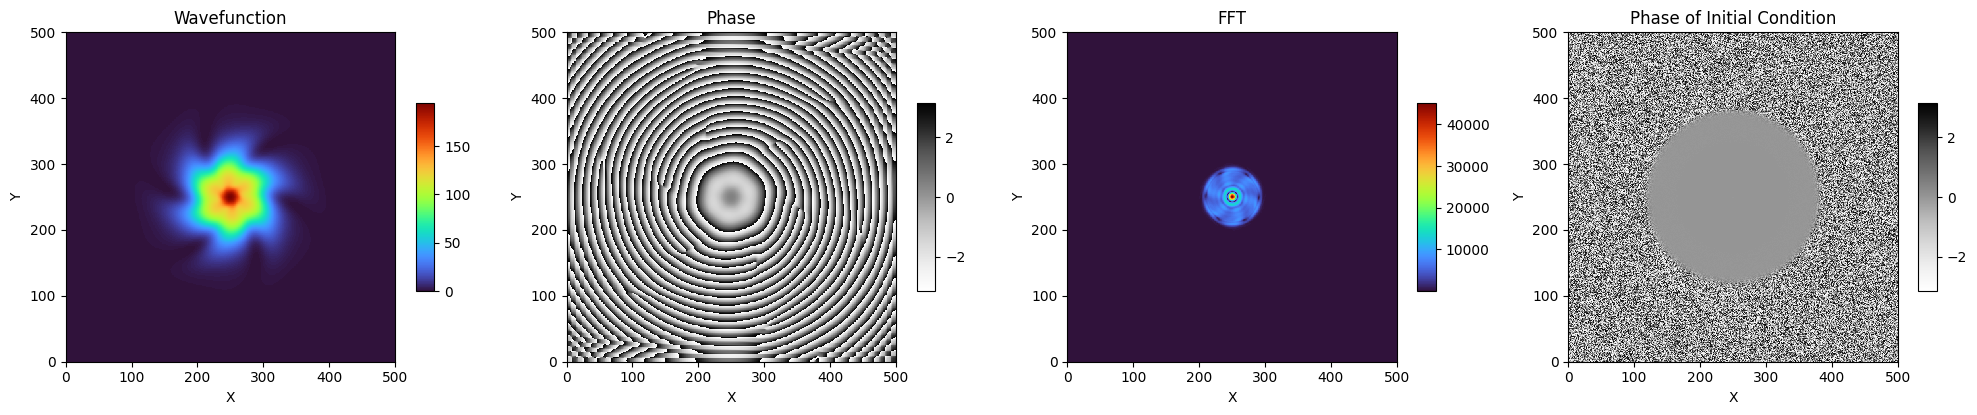

In [3]:
# Plot Results
data = np.loadtxt( os.path.join(ph.get_result_path(), "wavefunction_plus.txt") )
re,im = data[:grid_size,:], data[grid_size:,:]
psi = (re + 1j*im).reshape(grid_size,grid_size)
data = np.loadtxt( os.path.join(ph.get_result_path(), "initial_wavefunction_plus.txt") )
re,im = data[:grid_size,:], data[grid_size:,:]
initial_psi = (re + 1j*im).reshape(grid_size,grid_size)
fft = np.fft.fftshift( np.fft.fft2(psi) )

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5))
ax1.set_title("Wavefunction")
plt_psi = ax1.pcolormesh(np.abs(psi)**2, cmap="turbo")
ax2.set_title("Phase")
plt_phase = ax2.pcolormesh(np.angle(psi), cmap="Grays")
ax3.set_title("FFT")
plt_fft = ax3.pcolormesh(np.abs(fft), cmap="turbo")
ax4.set_title("Phase of Initial Condition")
plt_phase = ax4.pcolormesh(np.angle(initial_psi), cmap="Grays")

for ax,plot in zip((ax1,ax2,ax3,ax4),(plt_psi,plt_phase,plt_fft,plt_phase)):
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_aspect("equal")
    fig.colorbar(plot, ax=ax, shrink=0.4, aspect=10)

plt.tight_layout()

## Define Charges
We define the charges using m_+ + m_-  and m_+ - m_-.

In [4]:
settings = [
    (-4, 0, 12),
    (-3,1, 10),
    (-2,2, 8),
    (-1,3, 10),
    (0,4, 12),

    (-3,0, 10),
    (-2,1, 8),
    (-1,2, 8),
    (0,3, 10),

    (-3,-1, 10),
    (-2,0, 8),
    (-1,1,4.5),
    (0,2,8),
    (1,3,10),

    (-2,-1,8),
    (-1,0,4.5),
    (0,1,4.5),
    (1,2,8),

    (-2,-2,8),
    (-1,-1,4.5),
    (0,0,4.5),
    (1,1,4.5),
    (2,2,8),

    (-1,-2,8),
    (0,-1,4.5),
    (1,0,4.5),
    (2,1,8),

    (-1,-3,10),
    (0,-2,8),
    (1,-1,4.5),
    (2,0,8),
    (3,1,10),

    (0,-3,10),
    (1,-2,8),
    (2,-1,8),
    (3,0,10),

    (0,-4,12),
    (1,-3,10),
    (2,-2,8),
    (3,-1,10),
    (4,0,12),
]

t_max = 500

wavefunctions_plus, wavefunctions_minus = [], []
ffts_plus, ffts_minus = [], []

for m_plus, m_minus, pump_sigma  in settings:
    run(t_max = t_max, m_plus = m_plus, m_minus = m_minus, pump_sigma = pump_sigma/np.sqrt(2), simple_output=False)
    for prefix,(target_plus,target_minus) in zip( ["fft","wavefunction"],[(ffts_plus,ffts_minus),(wavefunctions_plus,wavefunctions_minus)] ):
        data_plus = np.loadtxt( os.path.join(ph.get_result_path(), f"{prefix}_plus.txt") )
        data_minus = np.loadtxt( os.path.join(ph.get_result_path(), f"{prefix}_minus.txt") )
        re_plus,im_plus = data_plus[:grid_size,:], data_plus[grid_size:,:]
        re_minus,im_minus = data_minus[:grid_size,:], data_minus[grid_size:,:]
        plus = (re_plus + 1j*im_plus).reshape(grid_size,grid_size)
        minus = (re_minus + 1j*im_minus).reshape(grid_size,grid_size)
        target_plus.append(plus)
        target_minus.append(minus)

    T = 450ps - dt = 0.08ps
    Progress: [▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇]  90%   
    Current System: TE/TM - No Stochastic
    Runtime: 1s, remaining: 0s
    Time per ps: 0.0039s/ps-  260ps/s-  3.23e+03it/s


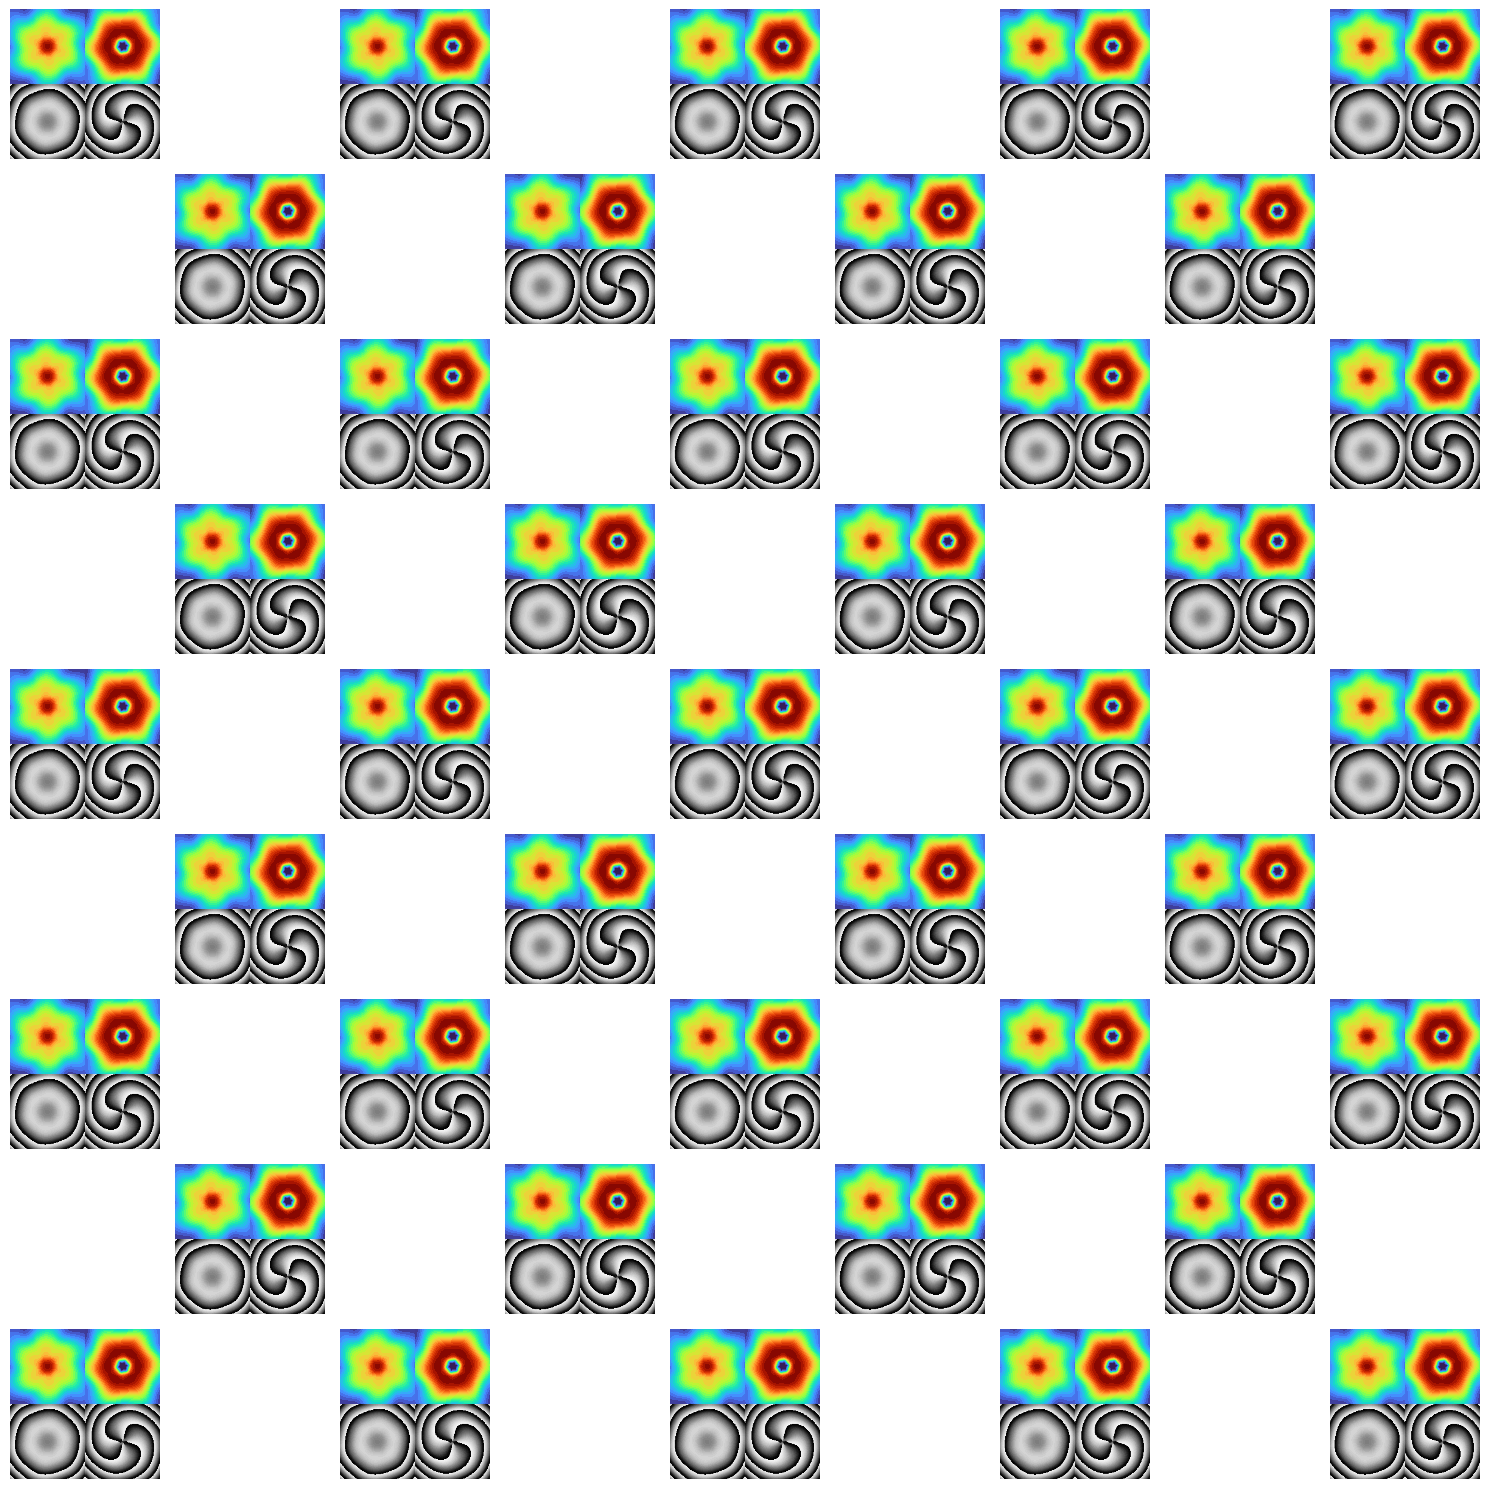

In [6]:
num_plots = len(settings)

fig,axes = plt.subplots(9,9,figsize=(15,15))

[ax.axis("off") for ax in axes.flat]

x = np.linspace(-x_max, x_max, grid_size)
y = np.linspace(-x_max, x_max, grid_size)
X,Y = np.meshgrid(x,y)

plotwindow_map = {
    4.5 : 30,
    8 : 50,
    10 : 60,
    12 : 70,
    -4.5 : 50,
    -8 : 50,
    -10 : 50,
    -12 : 50,
}

for i,(ax,plus,minus) in enumerate(zip(axes.flat[::2], wavefunctions_plus, wavefunctions_minus)):
    plot_window = plotwindow_map[-settings[i][2]]
    plot_plus = plus[np.logical_and(np.abs(X) < plot_window, np.abs(Y) < plot_window)]
    plot_minus = minus[np.logical_and(np.abs(X) < plot_window, np.abs(Y) < plot_window)]
    plot_X = X[np.logical_and(np.abs(X) < plot_window, np.abs(Y) < plot_window)]
    plot_Y = Y[np.logical_and(np.abs(X) < plot_window, np.abs(Y) < plot_window)]
    ax.tricontourf(plot_X,plot_Y,np.abs(plot_plus)**2, levels = 30, cmap = "turbo")#, vmin=0, vmax=160)
    ax.tricontourf(plot_X+2*plot_window,plot_Y,np.abs(plot_minus)**2, levels = 30, cmap = "turbo")#, vmin=0, vmax=160)
    ax.tricontourf(plot_X,plot_Y-2*plot_window,np.angle(plot_plus), levels = 50, cmap = "Grays")
    ax.tricontourf(plot_X+2*plot_window,plot_Y-2*plot_window,np.angle(plot_minus), levels = 50, cmap = "Grays")

    ax.set_aspect("equal")
    ax.axis("off")
plt.tight_layout()